In [1]:
# Load libraries and global parameters
packages =  c("ggExtra","DescTools","lubridate","Hmisc", "ggplot2","directlabels", "dplyr", "tidyr", "data.table", 'corrplot', 'gridExtra', 'forecast', 'tseries', 'TSA', 'tibble', 'TTR', 'xts', 'dygraphs', 'assertthat')

my.install <- function(pkg, ...){
  if (!(pkg %in% installed.packages()[,1])) {
    install.packages(pkg)
  }
  return (library(pkg, ...))
}

purrr::walk(packages, my.install, character.only = TRUE, warn.conflicts = FALSE)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2

corrplot 0.84 loaded

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [2]:
crime.data = read.csv('crime_report.csv')
str(crime.data)

'data.frame':	2829 obs. of  15 variables:
 $ report_year        : int  1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 ...
 $ agency_code        : Factor w/ 69 levels "","AZ00717","AZ00723",..: 42 59 22 14 61 30 33 29 44 39 ...
 $ agency_jurisdiction: Factor w/ 69 levels "Albuquerque, NM",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ population         : int  286238 112478 490584 116656 300400 642154 864100 616120 422276 262103 ...
 $ violent_crimes     : int  2383 278 8033 611 1215 1259 16086 11386 3350 1937 ...
 $ homicides          : int  30 5 185 7 33 25 259 119 63 68 ...
 $ rapes              : int  181 28 443 44 190 137 463 453 192 71 ...
 $ assaults           : int  1353 132 3518 389 463 347 6309 3036 755 976 ...
 $ robberies          : int  819 113 3887 171 529 750 9055 7778 2340 822 ...
 $ months_reported    : int  12 12 12 12 12 12 12 12 12 12 ...
 $ crimes_percapita   : num  833 247 1637 524 404 ...
 $ homicides_percapita: num  10.48 4.45 37.71 6 10.99 ...
 $ rapes_percapita    : num  6

In [3]:
#Overview of data
summary(crime.data)
str(crime.data)

  report_year    agency_code             agency_jurisdiction   population     
 Min.   :1975          :  41   Albuquerque, NM     :  41     Min.   : 100763  
 1st Qu.:1985   AZ00717:  41   Arlington, TX       :  41     1st Qu.: 377931  
 Median :1995   AZ00723:  41   Atlanta, GA         :  41     Median : 536614  
 Mean   :1995   AZ01003:  41   Aurora, CO          :  41     Mean   : 795698  
 3rd Qu.:2005   CA00109:  41   Austin, TX          :  41     3rd Qu.: 816856  
 Max.   :2015   CA01005:  41   Baltimore County, MD:  41     Max.   :8550861  
                (Other):2583   (Other)             :2583     NA's   :69       
 violent_crimes      homicides           rapes           assaults    
 Min.   :    154   Min.   :    1.0   Min.   :  15.0   Min.   :   15  
 1st Qu.:   3015   1st Qu.:   32.0   1st Qu.: 176.2   1st Qu.: 1467  
 Median :   5136   Median :   64.0   Median : 291.0   Median : 2597  
 Mean   :  29633   Mean   :  398.4   Mean   : 416.3   Mean   : 4405  
 3rd Qu.:   9058  

'data.frame':	2829 obs. of  15 variables:
 $ report_year        : int  1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 ...
 $ agency_code        : Factor w/ 69 levels "","AZ00717","AZ00723",..: 42 59 22 14 61 30 33 29 44 39 ...
 $ agency_jurisdiction: Factor w/ 69 levels "Albuquerque, NM",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ population         : int  286238 112478 490584 116656 300400 642154 864100 616120 422276 262103 ...
 $ violent_crimes     : int  2383 278 8033 611 1215 1259 16086 11386 3350 1937 ...
 $ homicides          : int  30 5 185 7 33 25 259 119 63 68 ...
 $ rapes              : int  181 28 443 44 190 137 463 453 192 71 ...
 $ assaults           : int  1353 132 3518 389 463 347 6309 3036 755 976 ...
 $ robberies          : int  819 113 3887 171 529 750 9055 7778 2340 822 ...
 $ months_reported    : int  12 12 12 12 12 12 12 12 12 12 ...
 $ crimes_percapita   : num  833 247 1637 524 404 ...
 $ homicides_percapita: num  10.48 4.45 37.71 6 10.99 ...
 $ rapes_percapita    : num  6

In [4]:
#Data Cleaning
crime.data[!complete.cases(crime.data),]
nrow(crime.data[!complete.cases(crime.data),])

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,1975,KY05680,"Louisville, KY",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
69,1975,,United States,NA,1039710,20510,NA,NA,NA,NA,487.8,9.60,NA,NA,NA
100,1976,KY05680,"Louisville, KY",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
138,1976,,United States,NA,1004210,18780,NA,NA,NA,NA,467.8,8.70,NA,NA,NA
169,1977,KY05680,"Louisville, KY",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
207,1977,,United States,NA,1029580,19120,NA,NA,NA,NA,475.9,8.80,NA,NA,NA
238,1978,KY05680,"Louisville, KY",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
276,1978,,United States,NA,1085550,19560,NA,NA,NA,NA,497.8,9.00,NA,NA,NA
307,1979,KY05680,"Louisville, KY",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 141

The total records having missing values is 141. Upon suspection, the column months_reported has the most missing values. Since it does not directly effect the number of crimes, it is imputed with the mode. After imputation, incomplete cases reduced to 76. These 76 records were then removed rather than imputed since the data used is very sensitive and is unethical to assume a crime rate for a particular area.

In [5]:
library(Hmisc)
library(DescTools)

# Check for 0 and missing values
sum(is.na(crime.data$months_reported))
sum(crime.data$months_reported == 0)

# impute column month with mode
crime.data$months_reported[which(is.na(crime.data$months_reported))] = as.integer(Mode(crime.data$months_reported))

#impute invalid data for months_reported with mode
crime.data$months_reported[which(crime.data$months_reported <1)] = as.integer(Mode(crime.data$months_reported))

# validate no 0 and missing values
sum(crime.data$months_reported == 0)
sum(is.na(crime.data$months_reported))

[1] 137

[1] NA

[1] NA

[1] 155

In [6]:
# remove records with missing values
crime.data = na.omit(crime.data)
summary(crime.data)

  report_year    agency_code             agency_jurisdiction   population     
 Min.   :1975   AZ00717:  40   Albuquerque, NM     :  40     Min.   : 100763  
 1st Qu.:1984   AZ00723:  40   Arlington, TX       :  40     1st Qu.: 377042  
 Median :1995   AZ01003:  40   Atlanta, GA         :  40     Median : 532717  
 Mean   :1995   CA01005:  40   Aurora, CO          :  40     Mean   : 791904  
 3rd Qu.:2005   CA01900:  40   Austin, TX          :  40     3rd Qu.: 808460  
 Max.   :2014   CA01941:  40   Baltimore County, MD:  40     Max.   :8473938  
                (Other):2434   (Other)             :2434                      
 violent_crimes     homicides          rapes           assaults    
 Min.   :   154   Min.   :   1.0   Min.   :  15.0   Min.   :   15  
 1st Qu.:  2993   1st Qu.:  32.0   1st Qu.: 177.0   1st Qu.: 1474  
 Median :  5090   Median :  63.0   Median : 289.5   Median : 2600  
 Mean   :  8994   Mean   : 125.6   Mean   : 415.0   Mean   : 4416  
 3rd Qu.:  8816   3rd Qu.: 1

In [7]:
#Extracting crime columns from the data
crime.data.crime = crime.data[,c(5,6,7,8,9)]
summary(crime.data.crime)

 violent_crimes     homicides          rapes           assaults    
 Min.   :   154   Min.   :   1.0   Min.   :  15.0   Min.   :   15  
 1st Qu.:  2993   1st Qu.:  32.0   1st Qu.: 177.0   1st Qu.: 1474  
 Median :  5090   Median :  63.0   Median : 289.5   Median : 2600  
 Mean   :  8994   Mean   : 125.6   Mean   : 415.0   Mean   : 4416  
 3rd Qu.:  8816   3rd Qu.: 127.0   3rd Qu.: 464.0   3rd Qu.: 4560  
 Max.   :174542   Max.   :2245.0   Max.   :3899.0   Max.   :71030  
   robberies     
 Min.   :    83  
 1st Qu.:  1038  
 Median :  1966  
 Mean   :  4038  
 3rd Qu.:  3630  
 Max.   :107475  

In [8]:
#Totaling all crimes

total = rowSums(crime.data[,c(5,6,7,8,9)])
crime.data = cbind(crime.data, total)

'data.frame':	2674 obs. of  16 variables:
 $ report_year        : int  1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 ...
 $ agency_code        : Factor w/ 69 levels "","AZ00717","AZ00723",..: 42 59 22 14 61 30 33 29 44 39 ...
 $ agency_jurisdiction: Factor w/ 69 levels "Albuquerque, NM",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ population         : int  286238 112478 490584 116656 300400 642154 864100 616120 422276 262103 ...
 $ violent_crimes     : int  2383 278 8033 611 1215 1259 16086 11386 3350 1937 ...
 $ homicides          : int  30 5 185 7 33 25 259 119 63 68 ...
 $ rapes              : int  181 28 443 44 190 137 463 453 192 71 ...
 $ assaults           : int  1353 132 3518 389 463 347 6309 3036 755 976 ...
 $ robberies          : int  819 113 3887 171 529 750 9055 7778 2340 822 ...
 $ months_reported    : int  12 12 12 12 12 12 12 12 12 12 ...
 $ crimes_percapita   : num  833 247 1637 524 404 ...
 $ homicides_percapita: num  10.48 4.45 37.71 6 10.99 ...
 $ rapes_percapita    : num  6

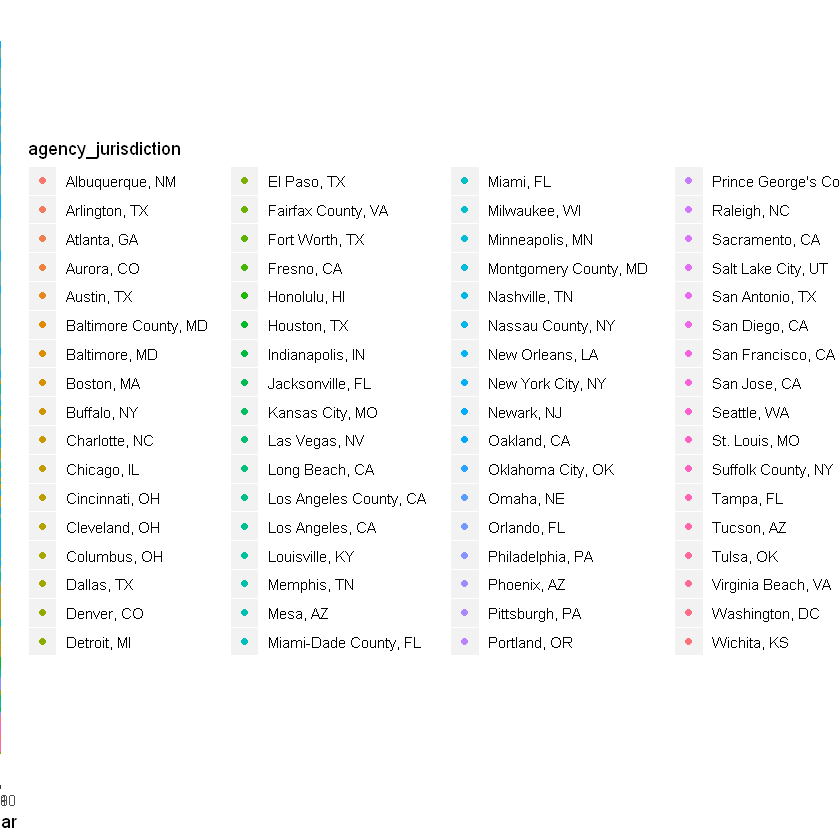

In [9]:
library(directlabels)

str(crime.data)
    ggplot(data=crime.data, aes(x=report_year, y=total, group=agency_jurisdiction, col=agency_jurisdiction)) +
    geom_line(color="#69b3a2") + 
    scale_y_continuous(labels = scales::comma) +
    xlab("year") + geom_dl(aes(label=agency_jurisdiction), method="last.points")  +
    geom_point()

#graph shows in R

In [15]:
#Add date column for ggplot time series
library(lubridate)
date.temp = as.Date(as.character(crime.data$report_year), format = "%Y", tz="UTC")
month(date.temp) = crime.data$months_reported
report_date = date.temp
#crime.data = cbind(crime.data, report_date)
crime.data

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,total,report_date
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,1975,NM00101,"Albuquerque, NM",286238,2383,30,181,1353,819,12,832.52,10.48,63.23,472.68,286.13,4766,1975-12-06
2,1975,TX22001,"Arlington, TX",112478,278,5,28,132,113,12,247.16,4.45,24.89,117.36,100.46,556,1975-12-06
3,1975,GAAPD00,"Atlanta, GA",490584,8033,185,443,3518,3887,12,1637.44,37.71,90.30,717.10,792.32,16066,1975-12-06
4,1975,CO00101,"Aurora, CO",116656,611,7,44,389,171,12,523.76,6.00,37.72,333.46,146.58,1222,1975-12-06
5,1975,TX22701,"Austin, TX",300400,1215,33,190,463,529,12,404.46,10.99,63.25,154.13,176.10,2430,1975-12-06
6,1975,MD00301,"Baltimore County, MD",642154,1259,25,137,347,750,12,196.06,3.89,21.33,54.04,116.79,2518,1975-12-06
7,1975,MDBPD00,"Baltimore, MD",864100,16086,259,463,6309,9055,12,1861.59,29.97,53.58,730.12,1047.91,32172,1975-12-06
8,1975,MA01301,"Boston, MA",616120,11386,119,453,3036,7778,12,1848.02,19.31,73.52,492.76,1262.42,22772,1975-12-06
9,1975,NY01401,"Buffalo, NY",422276,3350,63,192,755,2340,12,793.32,14.92,45.47,178.79,554.14,6700,1975-12-06


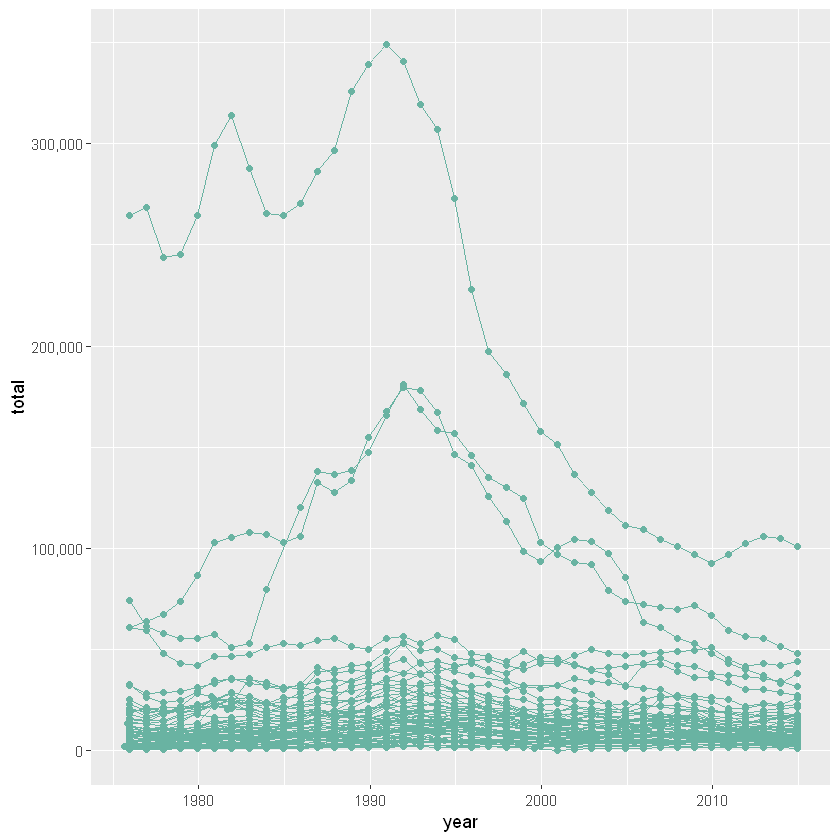

In [11]:
crime.line =
    ggplot(data=crime.data, aes(x=report_date, y=total, group=agency_jurisdiction)) +
    geom_line(color="#69b3a2") + 
    scale_y_continuous(labels = scales::comma) +
    xlab("year") +
    geom_point(color="#69b3a2")
crime.line

In [18]:
######################### NOT WORKING #####################
# Heatmap

library(ggplot2)
library(dplyr) # easier data wrangling 
library(viridis) # colour blind friendly palette, works in B&W also
library(lubridate) # for easy date manipulation
library(ggExtra) # because remembering ggplot theme options is beyond me
library(tidyr) 

p <-ggplot(crime.data,aes(report_date,total))+
  geom_tile(color= "white",size=0.1) + 
  scale_fill_viridis(name="Hrly Temps C",option ="C")
p <-p + facet_grid(report_year~months_reported)
p <-p + scale_y_continuous(trans = "reverse", breaks = unique(crime.data$total))
p <-p + scale_x_continuous(breaks =c(1,10,20,31))
p <-p + theme_minimal(base_size = 8)
p <-p + theme(legend.position = "bottom")+
  theme(plot.title=element_text(size = 14))+
  theme(axis.text.y=element_text(size=6)) +
  theme(strip.background = element_rect(colour="white"))+
  theme(plot.title=element_text(hjust=0))+
  theme(axis.ticks=element_blank())+
  theme(axis.text=element_text(size=7))+
  theme(legend.title=element_text(size=8))+
  theme(legend.text=element_text(size=6))+
  removeGrid()#ggExtra

In [ ]:
# grouping data by jurisdiction

In [25]:
#Timeseries
crime.ts <- ts(crime.data[,c(16)], frequency=12, start=c(1975,1))
crime.ts


ERROR: Error in ts(crime.data[, c(16)], frequency = 12, start = c(1975, 1), group = crime.data$agency_jurisdiction): unused argument (group = crime.data$agency_jurisdiction)


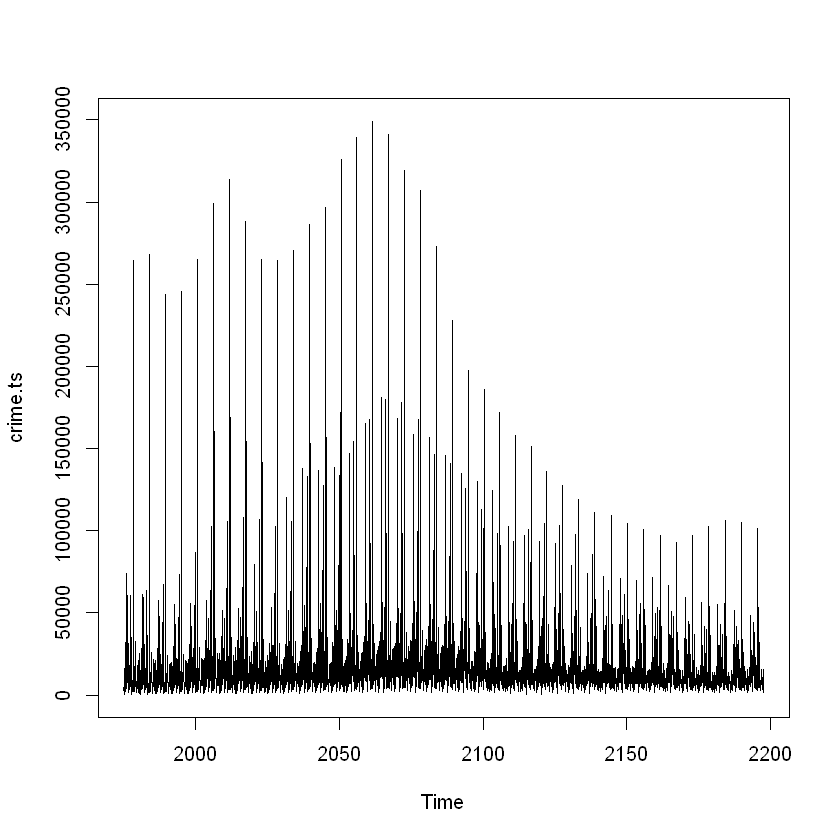

In [23]:
# Time series plot
plot.ts(crime.ts)

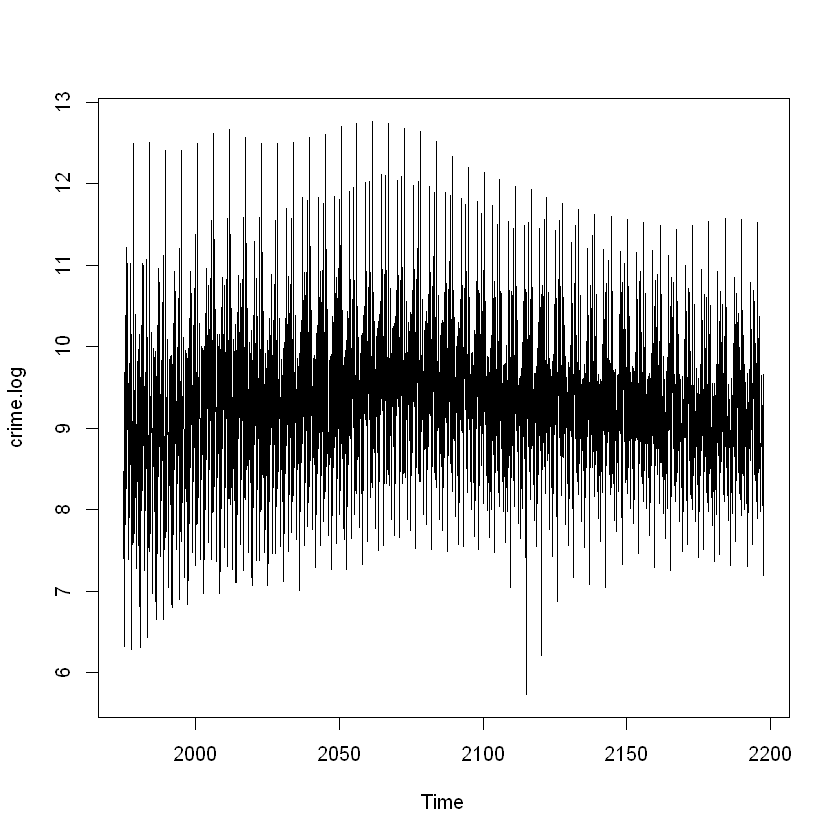

In [26]:
# Calculating natural log of data
crime.log = log(crime.ts)
plot.ts(crime.log)

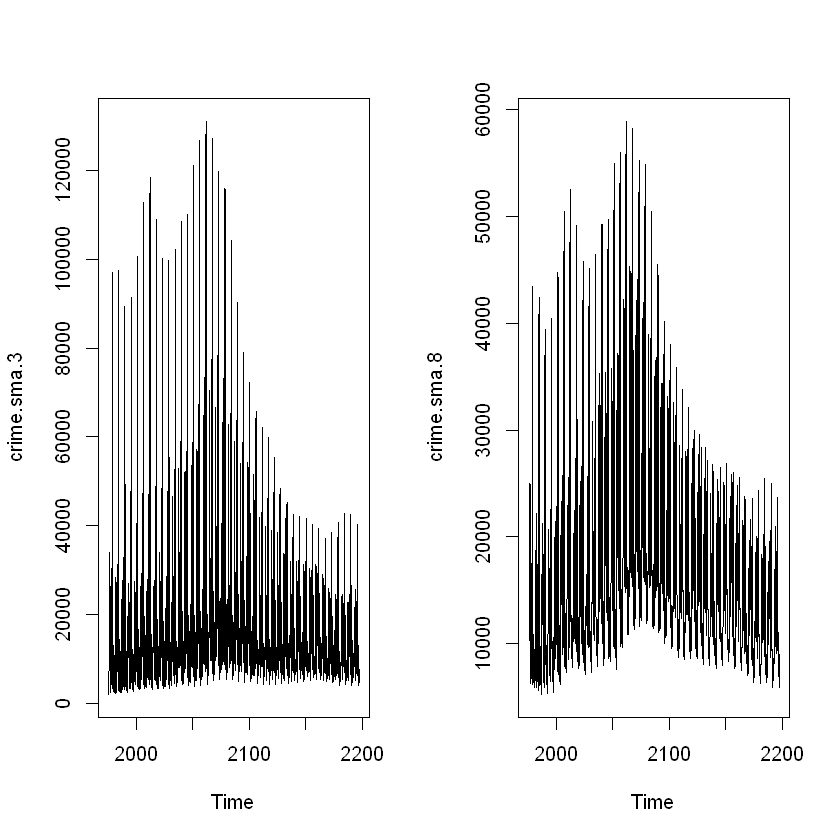

In [29]:
#Decomposing non-seasonal data using Simple Moving Algorithm

par(mfrow=c(1,2))
library("TTR")
crime.sma.3 = SMA(crime.ts,n=3)
plot.ts(crime.sma.3)
crime.sma.8 = SMA(crime.ts,n=8)
plot.ts(crime.sma.8)